In [1]:
import pandas as pd
import numpy as np

In [2]:
import re

def get_num(string=None):
    if re.findall('feat', string):
        num = int(re.findall('\d+', string)[0])
        return num
    else:
        return int(1)

### Loading City data

In [35]:
cidade = pd.read_csv("Experimentos_precipitação/quixeramobim_lags_6_steps_0.csv")
#del fortaleza['Unnamed: 0']
cidade.head()

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64,feat_65,feat_66,PRECIPITACAO TOTAL MENSAL(mm)
0,173.0,233.9,214.7,248.1,230.2,235.3,983.429032,983.982143,982.932258,983.381111,...,0.59,0.59,0.66,0.72,0.74,0.69,0.54,0.54,0.66,3.0
1,233.9,214.7,248.1,230.2,235.3,248.2,983.982143,982.932258,983.381111,984.904301,...,0.59,0.66,0.56,0.74,0.69,0.54,0.54,0.66,0.85,16.6
2,214.7,248.1,230.2,235.3,248.2,281.2,982.932258,983.381111,984.904301,986.508889,...,0.66,0.56,0.67,0.69,0.54,0.54,0.66,0.85,0.59,0.0
3,248.1,230.2,235.3,248.2,281.2,299.1,983.381111,984.904301,986.508889,986.517204,...,0.56,0.67,0.51,0.54,0.54,0.66,0.85,0.59,0.41,0.0
4,230.2,235.3,248.2,281.2,299.1,313.5,984.904301,986.508889,986.517204,986.092473,...,0.67,0.51,0.49,0.54,0.66,0.85,0.59,0.41,0.21,0.3


### Slicing the data set to remove specific features

In [36]:
df_reduced = cidade[[f for f in cidade.columns if get_num(f) < 25]]
df_reduced.columns

Index(['feat_1', 'feat_2', 'feat_3', 'feat_4', 'feat_5', 'feat_6', 'feat_7',
       'feat_8', 'feat_9', 'feat_10', 'feat_11', 'feat_12', 'feat_13',
       'feat_14', 'feat_15', 'feat_16', 'feat_17', 'feat_18', 'feat_19',
       'feat_20', 'feat_21', 'feat_22', 'feat_23', 'feat_24',
       'PRECIPITACAO TOTAL MENSAL(mm)'],
      dtype='object')

In [37]:
len(cidade)

189

In [38]:
from pycaret.regression import *

In [45]:
setup( df_reduced, session_id=2021, target='PRECIPITACAO TOTAL MENSAL(mm)')

,Description,Value
0,session_id,2021
1,Target,PRECIPITACAO TOTAL MENSAL(mm)
2,Original Data,"(189, 25)"
3,Missing Values,False
4,Numeric Features,24
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(132, 24)"


([<pandas.io.formats.style.Styler at 0x7f54cc202ca0>],
 [],
 False,
          feat_1      feat_2      feat_3      feat_4      feat_5      feat_6  \
 0    173.000000  233.899994  214.699997  248.100006  230.199997  235.300003   
 1    233.899994  214.699997  248.100006  230.199997  235.300003  248.199997   
 2    214.699997  248.100006  230.199997  235.300003  248.199997  281.200012   
 3    248.100006  230.199997  235.300003  248.199997  281.200012  299.100006   
 4    230.199997  235.300003  248.199997  281.200012  299.100006  313.500000   
 ..          ...         ...         ...         ...         ...         ...   
 184  238.100006  217.199997  232.500000  267.200012  257.600006  294.000000   
 185  217.199997  232.500000  267.200012  257.600006  294.000000  276.000000   
 186  232.500000  267.200012  257.600006  294.000000  276.000000  266.700012   
 187  267.200012  257.600006  294.000000  276.000000  266.700012  192.699997   
 188  257.600006  294.000000  276.000000  266.700012

In [46]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
llar,Lasso Least Angle Regression,35.7658,2092.6260,43.6011,0.3510,1.5305,7.3770,0.1480
catboost,CatBoost Regressor,32.1155,2055.6330,42.4693,0.3358,1.3558,5.7890,1.2540
omp,Orthogonal Matching Pursuit,34.7735,2099.0910,44.1072,0.2936,1.3323,5.6373,0.1130
rf,Random Forest Regressor,33.2784,2209.7011,44.1515,0.2746,1.3634,6.3017,0.0660
lightgbm,Light Gradient Boosting Machine,33.0412,2295.1301,44.6611,0.2606,1.4124,5.3740,0.1110
et,Extra Trees Regressor,33.7103,2101.2911,43.9600,0.2474,1.3710,6.4835,0.0540
gbr,Gradient Boosting Regressor,33.1748,2372.0028,45.0098,0.2091,1.3109,6.8522,0.0150
ada,AdaBoost Regressor,36.1417,2386.2331,45.8706,0.2028,1.5883,8.6757,0.0180
lasso,Lasso Regression,35.8093,2270.4571,45.4098,0.1585,1.3808,6.1309,0.1250
xgboost,Extreme Gradient Boosting,34.2073,2570.5121,47.1591,0.1227,1.2405,5.7157,53.4300


LassoLars(alpha=1.0, copy_X=True, eps=2.220446049250313e-16, fit_intercept=True,
          fit_path=True, jitter=None, max_iter=500, normalize=True,
          positive=False, precompute='auto', random_state=2021, verbose=False)

In [48]:
model = create_model('llar')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,31.4369,1489.6373,38.5958,0.4721,1.8064,10.9134
1,22.6568,629.3163,25.0862,0.3312,1.3767,12.2635
2,50.6664,4303.3545,65.6000,0.3047,1.3488,4.4200
3,34.9598,1475.3856,38.4107,0.5715,1.6524,1.8862
4,26.4613,981.2931,31.3256,0.6842,1.7673,13.9654
5,32.2952,1272.6737,35.6746,0.4404,1.3980,2.2719
6,41.3435,2632.8702,51.3115,-0.2002,1.6030,12.1814
7,43.4044,2638.0360,51.3618,0.3284,1.2397,4.9074
8,24.9008,989.6410,31.4586,0.2046,1.4036,6.7346
9,49.5328,4514.0526,67.1867,0.3733,1.7095,4.2258


In [59]:
model_tuned = tune_model(model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,31.4369,1489.6373,38.5958,0.4721,1.8064,10.9134
1,22.6568,629.3163,25.0862,0.3312,1.3767,12.2635
2,50.6664,4303.3545,65.6000,0.3047,1.3488,4.4200
3,34.9598,1475.3856,38.4107,0.5715,1.6524,1.8862
4,26.4613,981.2931,31.3256,0.6842,1.7673,13.9654
5,32.2952,1272.6737,35.6746,0.4404,1.3980,2.2719
6,41.3435,2632.8702,51.3115,-0.2002,1.6030,12.1814
7,43.4044,2638.0360,51.3618,0.3284,1.2397,4.9074
8,24.9008,989.6410,31.4586,0.2046,1.4036,6.7346
9,49.5328,4514.0526,67.1867,0.3733,1.7095,4.2258


/home/9679247/Documentos/VirtualEnvs/PyCaret/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:598: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 42 iterations, alpha=1.299e+00, previous alpha=1.253e+00, with an active set of 23 regressors.
  warnings.warn('Early stopping the lars path, as the residues '
/home/9679247/Documentos/VirtualEnvs/PyCaret/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:598: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 54 iterations, alpha=3.919e+00, previous alpha=1.115e+00, with an active set of 23 regressors.
  warnings.warn('Early stopping the lars path, as the residues '
/home/9679247/Documentos/VirtualEnvs/PyCaret/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:598: ConvergenceWarning: Early stopping the lars path, as the resi

/home/9679247/Documentos/VirtualEnvs/PyCaret/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:598: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 46 iterations, alpha=3.970e+00, previous alpha=3.954e+00, with an active set of 21 regressors.
  warnings.warn('Early stopping the lars path, as the residues '
/home/9679247/Documentos/VirtualEnvs/PyCaret/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:598: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 54 iterations, alpha=3.919e+00, previous alpha=1.115e+00, with an active set of 23 regressors.
  warnings.warn('Early stopping the lars path, as the residues '
/home/9679247/Documentos/VirtualEnvs/PyCaret/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:598: ConvergenceWarning: Early stopping the lars path, as the resi

/home/9679247/Documentos/VirtualEnvs/PyCaret/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:598: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 42 iterations, alpha=1.299e+00, previous alpha=1.253e+00, with an active set of 23 regressors.
  warnings.warn('Early stopping the lars path, as the residues '
/home/9679247/Documentos/VirtualEnvs/PyCaret/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:598: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 42 iterations, alpha=1.299e+00, previous alpha=1.253e+00, with an active set of 23 regressors.
  warnings.warn('Early stopping the lars path, as the residues '
/home/9679247/Documentos/VirtualEnvs/PyCaret/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:598: ConvergenceWarning: Early stopping the lars path, as the resi

/home/9679247/Documentos/VirtualEnvs/PyCaret/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:598: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 54 iterations, alpha=3.919e+00, previous alpha=1.115e+00, with an active set of 23 regressors.
  warnings.warn('Early stopping the lars path, as the residues '
/home/9679247/Documentos/VirtualEnvs/PyCaret/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:598: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 54 iterations, alpha=3.919e+00, previous alpha=1.115e+00, with an active set of 23 regressors.
  warnings.warn('Early stopping the lars path, as the residues '
/home/9679247/Documentos/VirtualEnvs/PyCaret/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:598: ConvergenceWarning: Early stopping the lars path, as the resi

/home/9679247/Documentos/VirtualEnvs/PyCaret/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:598: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 46 iterations, alpha=3.970e+00, previous alpha=3.954e+00, with an active set of 21 regressors.
  warnings.warn('Early stopping the lars path, as the residues '
/home/9679247/Documentos/VirtualEnvs/PyCaret/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:598: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 46 iterations, alpha=3.970e+00, previous alpha=3.954e+00, with an active set of 21 regressors.
  warnings.warn('Early stopping the lars path, as the residues '
/home/9679247/Documentos/VirtualEnvs/PyCaret/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:598: ConvergenceWarning: Early stopping the lars path, as the resi

/home/9679247/Documentos/VirtualEnvs/PyCaret/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:598: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 54 iterations, alpha=3.919e+00, previous alpha=1.115e+00, with an active set of 23 regressors.
  warnings.warn('Early stopping the lars path, as the residues '
/home/9679247/Documentos/VirtualEnvs/PyCaret/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:598: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 54 iterations, alpha=3.919e+00, previous alpha=1.115e+00, with an active set of 23 regressors.
  warnings.warn('Early stopping the lars path, as the residues '
/home/9679247/Documentos/VirtualEnvs/PyCaret/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:598: ConvergenceWarning: Early stopping the lars path, as the resi

/home/9679247/Documentos/VirtualEnvs/PyCaret/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:598: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 54 iterations, alpha=3.919e+00, previous alpha=1.115e+00, with an active set of 23 regressors.
  warnings.warn('Early stopping the lars path, as the residues '
/home/9679247/Documentos/VirtualEnvs/PyCaret/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:598: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 42 iterations, alpha=1.299e+00, previous alpha=1.253e+00, with an active set of 23 regressors.
  warnings.warn('Early stopping the lars path, as the residues '
/home/9679247/Documentos/VirtualEnvs/PyCaret/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:598: ConvergenceWarning: Early stopping the lars path, as the resi

/home/9679247/Documentos/VirtualEnvs/PyCaret/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:598: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 42 iterations, alpha=1.299e+00, previous alpha=1.253e+00, with an active set of 23 regressors.
  warnings.warn('Early stopping the lars path, as the residues '
/home/9679247/Documentos/VirtualEnvs/PyCaret/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:598: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 46 iterations, alpha=3.970e+00, previous alpha=3.954e+00, with an active set of 21 regressors.
  warnings.warn('Early stopping the lars path, as the residues '
/home/9679247/Documentos/VirtualEnvs/PyCaret/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:598: ConvergenceWarning: Early stopping the lars path, as the resi

/home/9679247/Documentos/VirtualEnvs/PyCaret/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:598: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 46 iterations, alpha=3.970e+00, previous alpha=3.954e+00, with an active set of 21 regressors.
  warnings.warn('Early stopping the lars path, as the residues '
/home/9679247/Documentos/VirtualEnvs/PyCaret/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:598: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 46 iterations, alpha=3.970e+00, previous alpha=3.954e+00, with an active set of 21 regressors.
  warnings.warn('Early stopping the lars path, as the residues '
/home/9679247/Documentos/VirtualEnvs/PyCaret/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:598: ConvergenceWarning: Early stopping the lars path, as the resi

/home/9679247/Documentos/VirtualEnvs/PyCaret/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:598: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 46 iterations, alpha=3.970e+00, previous alpha=3.954e+00, with an active set of 21 regressors.
  warnings.warn('Early stopping the lars path, as the residues '
/home/9679247/Documentos/VirtualEnvs/PyCaret/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:598: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 46 iterations, alpha=3.970e+00, previous alpha=3.954e+00, with an active set of 21 regressors.
  warnings.warn('Early stopping the lars path, as the residues '
/home/9679247/Documentos/VirtualEnvs/PyCaret/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:598: ConvergenceWarning: Early stopping the lars path, as the resi

/home/9679247/Documentos/VirtualEnvs/PyCaret/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:598: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 54 iterations, alpha=3.919e+00, previous alpha=1.115e+00, with an active set of 23 regressors.
  warnings.warn('Early stopping the lars path, as the residues '
/home/9679247/Documentos/VirtualEnvs/PyCaret/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:598: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 54 iterations, alpha=3.919e+00, previous alpha=1.115e+00, with an active set of 23 regressors.
  warnings.warn('Early stopping the lars path, as the residues '
/home/9679247/Documentos/VirtualEnvs/PyCaret/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:598: ConvergenceWarning: Early stopping the lars path, as the resi

/home/9679247/Documentos/VirtualEnvs/PyCaret/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:598: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 42 iterations, alpha=1.299e+00, previous alpha=1.253e+00, with an active set of 23 regressors.
  warnings.warn('Early stopping the lars path, as the residues '
/home/9679247/Documentos/VirtualEnvs/PyCaret/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:598: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 54 iterations, alpha=3.919e+00, previous alpha=1.115e+00, with an active set of 23 regressors.
  warnings.warn('Early stopping the lars path, as the residues '
/home/9679247/Documentos/VirtualEnvs/PyCaret/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:598: ConvergenceWarning: Early stopping the lars path, as the resi

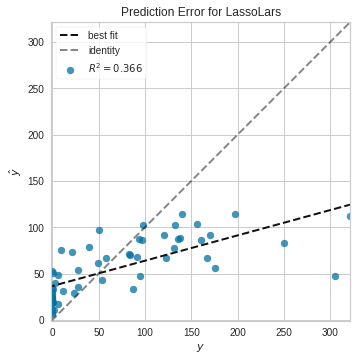

/home/9679247/Documentos/VirtualEnvs/PyCaret/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:598: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 54 iterations, alpha=3.919e+00, previous alpha=1.115e+00, with an active set of 23 regressors.
  warnings.warn('Early stopping the lars path, as the residues '
/home/9679247/Documentos/VirtualEnvs/PyCaret/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/9679247/Documentos/VirtualEnvs/PyCaret/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:598: ConvergenceWarning: Early stopping the lars path,

In [50]:
plot_model(model_tuned, plot='error')

In [19]:
evaluate_model(model_tuned, data)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
model_tuned.predict()

In [51]:
predict_model(model_tuned)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Least Angle Regression,42.8385,4072.4712,63.8159,0.3662,1.8988,6.3342


,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_17,feat_18,feat_19,feat_20,feat_21,feat_22,feat_23,feat_24,PRECIPITACAO TOTAL MENSAL(mm),Label
0,173.000000,233.899994,214.699997,248.100006,230.199997,235.300003,983.429016,983.982117,982.932251,983.381104,...,28.810968,28.422667,66.814514,58.294643,62.991936,62.408333,58.935486,49.691666,3.000000,40.330205
1,304.700012,288.700012,233.399994,211.100006,227.000000,167.199997,982.778503,984.843323,984.815063,984.636536,...,27.497240,25.387741,50.879032,51.700001,55.290321,56.451614,58.603447,68.604836,139.600006,114.257491
2,196.199997,191.500000,235.399994,261.500000,246.199997,214.899994,983.191650,984.515076,986.176697,985.813965,...,27.600000,27.176773,72.053574,78.266129,79.158333,69.056450,68.250000,72275.000000,0.000000,52.508798
3,281.100006,261.200012,227.899994,237.600006,227.100006,202.600006,985.798889,985.546265,986.197449,985.703552,...,28.592258,27.454666,60.541668,60.443546,65.129028,60.080357,62.709679,74.508331,93.400002,87.522940
4,191.500000,235.399994,261.500000,246.199997,214.899994,311.200012,984.515076,986.176697,985.813965,987.101135,...,27.176773,27.693548,78.266129,79.158333,69.056450,68.250000,72275.000000,61.911289,0.000000,6.620884
5,262.899994,283.100006,294.600006,305.200012,251.300003,299.500000,987.298889,987.880615,988.211853,986.159973,...,28.188387,28.819332,63.410713,54.822582,51.185486,51.458332,62.854839,57225.000000,86.900002,33.103750
6,284.500000,275.899994,297.000000,304.700012,288.700012,233.399994,987.847290,985.295532,984.695557,982.778503,...,28334.000000,27.925161,54.379032,51.049999,49375.000000,50.879032,51.700001,55.290321,83.599998,70.396729
7,203.399994,228.500000,252.500000,281.299988,305.000000,263.100006,985.133362,985.018250,985.792053,986.761047,...,27.963226,28.110001,85.283333,85.056450,80.891670,69.189651,61.290321,65.341667,23.600000,29.332732
8,268.899994,277.799988,254.500000,223.199997,227.100006,170.699997,986.837219,986.267761,985.094421,985.926880,...,27.428387,26.850000,58.348213,61.854839,61.283333,63.653225,70.298386,80.767860,97.500000,102.326448
9,289.200012,283.399994,304.600006,270.700012,259.000000,266.799988,986.936584,986.961121,985.962341,985.435547,...,28.496128,28.879999,51.620968,50.058334,50.846775,64275.000000,64.282257,63.225807,175.800003,56.455567


In [54]:
interpret_model(model_tuned)

TypeError: This function only supports tree based models for binary classification: xgboost, rf, et, catboost, lightgbm, dt.

In [53]:
!pip install shap

     |████████████████████████████████| 571 kB 6.5 MB/s eta 0:00:01
You should consider upgrading via the '/home/9679247/Documentos/VirtualEnvs/PyCaret/bin/python -m pip install --upgrade pip' command.
